In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt 
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file

C:\Users\Charans\AppData\Local\conda\conda\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
n_nodes_hl1 = 500
n_nodes_hl2 = 250
n_nodes_hl3 = 100
n_classes = 10
batch_size = 100

In [4]:
x = tf.placeholder('float',[None, 784])
y = tf.placeholder('float')

In [5]:
def neural_network_model(data):
    
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784,n_nodes_hl1])), 
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
    
    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1,n_nodes_hl2])), 
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}
    
    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl3])), 
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3,n_classes])), 
                      'biases':tf.Variable(tf.random_normal([n_classes]))}
    
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']),hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)
    
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']),hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']),hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    output = tf.matmul(l3, output_layer['weights']) + output_layer['biases']
    
    return(output,hidden_1_layer,hidden_2_layer,hidden_3_layer,output_layer)
    

In [8]:
def train_neural_network(x):
    
    prediction,w1,w2,w3,ow = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y))
    saver = tf.train.Saver()
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 10
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(hm_epochs):
            epoch_loss = 0 
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _,c = sess.run([optimizer, cost], feed_dict = {x:epoch_x,y:epoch_y})
                epoch_loss += c
                
            print('Epoch', epoch, 'completed out of', hm_epochs, 'loss:', epoch_loss)
        saver.save(sess,"./mnst_3layer.ckpt")        
        correct = tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
        
        accuracy = tf.reduce_mean(tf.cast(correct,'float')) 
        
        print('accuracy', accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))


In [9]:
train_neural_network(x)

Epoch 0 completed out of 10 loss: 607527.9224243164
Epoch 1 completed out of 10 loss: 136061.98454666138
Epoch 2 completed out of 10 loss: 78235.60026836395
Epoch 3 completed out of 10 loss: 51079.828359246254
Epoch 4 completed out of 10 loss: 34533.73668719083
Epoch 5 completed out of 10 loss: 24208.017017662525
Epoch 6 completed out of 10 loss: 16456.52896296978
Epoch 7 completed out of 10 loss: 11870.341078080237
Epoch 8 completed out of 10 loss: 8045.895824484287
Epoch 9 completed out of 10 loss: 6592.906287486439
accuracy 0.941


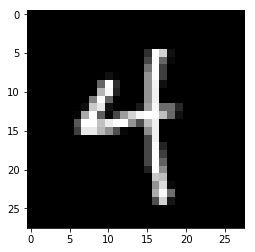

In [10]:
a = mnist.train.images[8]
X = a.reshape([28, 28]);
plt.imshow(X,cmap='gray')
check = a.reshape(1,784)

In [13]:
with tf.Session() as session:
    latest_ckp = tf.train.latest_checkpoint('./')
    print(latest_ckp)
    print_tensors_in_checkpoint_file(latest_ckp, all_tensors=True, tensor_name='')
    """restorer = tf.train.import_meta_graph("./mnst_3layer.ckpt.meta")
    restorer.restore(session, "./mnst_3layer.ckpt")
    model = neural_network_model(x)
    session.run(model,feed_dict = {x:check})"""

./mnst_3layer.ckpt
tensor_name:  Variable
[[-0.7006628  -0.48829156  0.3867203  ...  1.756809    1.4118501
  -1.35446   ]
 [ 1.7231722   0.20079567 -1.4663986  ...  1.2286199   0.916062
   0.33607873]
 [-0.24967381 -0.62412584 -0.26119584 ... -1.2823498  -0.04605028
   0.6099201 ]
 ...
 [ 0.5995847  -0.22270064  0.7917556  ...  0.54114026  0.4608259
  -0.96919996]
 [-0.29070196  0.40988776  0.5046303  ...  0.08295393 -0.81526905
   1.2407184 ]
 [-0.1468115   1.1102709   1.124116   ... -1.5840212  -0.01779364
   0.54876053]]
tensor_name:  Variable/Adam
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
tensor_name:  Variable/Adam_1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
tensor_name:  Variable_1
[-8.96966577e-01  1.50966370e+00 -5.66040687e-02 -5.17297387e-01
 -1.961637